In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# link data set
# https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings?resource=download

In [47]:
df = pd.read_csv("nyc-east-river-bicycle-counts.csv")
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [48]:
df = df.select_dtypes(include=["number"])
df.head()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,78.1,66.0,1704.0,3126,4115.0,2552.0,11497
1,1,55.0,48.9,827.0,1646,2565.0,1884.0,6922
2,2,39.9,34.0,526.0,1232,1695.0,1306.0,4759
3,3,44.1,33.1,521.0,1067,1440.0,1307.0,4335
4,4,42.1,26.1,1416.0,2617,3081.0,2357.0,9471


In [49]:
df.isnull().sum()

Unnamed: 0             0
High Temp (°F)         0
Low Temp (°F)          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

In [50]:
df.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Unnamed: 0,1.000000,0.070144,0.055420,0.100557,0.090508,0.096328,0.093006,0.095156
High Temp (°F),0.070144,1.000000,0.823853,0.739377,0.720175,0.764336,0.727825,0.743344
Low Temp (°F),0.055420,0.823853,1.000000,0.464550,0.465097,0.534212,0.475725,0.492124
Brooklyn Bridge,0.100557,0.739377,0.464550,1.000000,0.983148,0.980463,0.976991,0.989339
Manhattan Bridge,0.090508,0.720175,0.465097,0.983148,1.000000,0.989805,0.985867,0.996323
Williamsburg Bridge,0.096328,0.764336,0.534212,0.980463,0.989805,1.000000,0.988852,0.996639
Queensboro Bridge,0.093006,0.727825,0.475725,0.976991,0.985867,0.988852,1.000000,0.993391
Total,0.095156,0.743344,0.492124,0.989339,0.996323,0.996639,0.993391,1.000000


Correlación Positiva


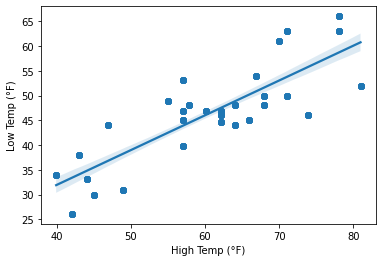

In [51]:
# Primer Par
x_label="High Temp (°F)"
y_label="Low Temp (°F)"
sns.regplot(x=x_label,y=y_label,data=df)
print("Correlación Positiva")

Correlación Positiva


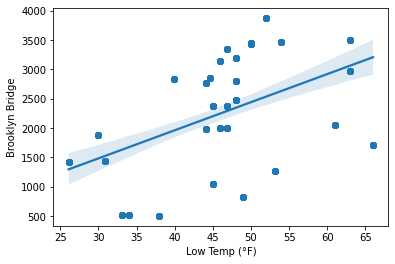

In [52]:
# Segunda Par
x_label="Low Temp (°F)"
y_label="Brooklyn Bridge"
sns.regplot(x=x_label,y=y_label,data=df)
print("Correlación Positiva")

Correlación Positiva


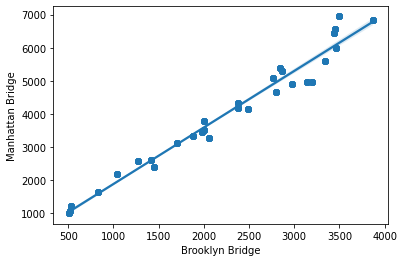

In [53]:
# Tercer Par
x_label="Brooklyn Bridge"
y_label="Manhattan Bridge"
sns.regplot(x=x_label,y=y_label,data=df)
print("Correlación Positiva")

Correlación Positiva


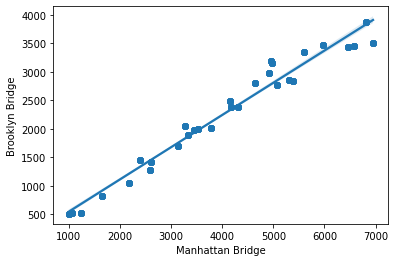

In [54]:
# Cuarto Par
x_label="Manhattan Bridge"
y_label="Brooklyn Bridge"
sns.regplot(x=x_label,y=y_label,data=df)
print("Correlación Positiva")

Correlación Positiva


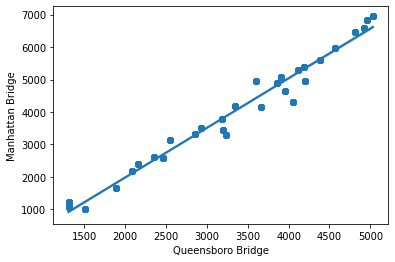

In [55]:
# Quinto Par
x_label="Queensboro Bridge"
y_label="Manhattan Bridge"
sns.regplot(x=x_label,y=y_label,data=df)
print("Correlación Positiva")


### Funciones para la regresión Lineal

In [56]:
def predict(thetas, x_data):
    return np.dot(x_data, thetas)
def fun_cost(x_data, y_result, thetas):
    cost = 0
    # m
    len_data_x = x_data.shape[0]
    cost = 0

    predict_error = predict(thetas, x_data) - y_result
    square_predict_error = np.power(predict_error, 2)

    sumatoria_error_cuadratico = np.sum(square_predict_error)
    cost = 1.0 / (2 * len_data_x) * sumatoria_error_cuadratico
    return cost
# gradiente descendiente
def gradient_descent(x_data, y_data, thetas, learning_rate=0.01, iterations=100):
    m = len(y_data)
    cost_history = np.zeros(iterations)
    n_features_ones = len(thetas)
    theta_history = np.zeros((iterations, n_features_ones))

    y_data = y_data.flatten()

    for it in range(iterations):
        prediction = predict(thetas, x_data)  # 8921
        thetas = thetas - learning_rate * (1 / m) * (
            x_data.T.dot((prediction - y_data))
        )

        theta_history[it] = thetas
        cost_history[it] = fun_cost(x_data, y_data, thetas)

    return thetas, cost_history, theta_history

In [57]:
from sklearn import preprocessing
#normalizar     
scaler = preprocessing.StandardScaler(with_std=True,with_mean=True).fit(df)
scaler_data = scaler.transform(df)
df = pd.DataFrame(scaler_data,columns=df.columns)

In [58]:
from sklearn.model_selection import train_test_split

def experiment(df, confg_train, features, label_y, percentage_test=0.3):
    n_features = len(features)
    
    # Separar datos
    df_scaler_train, df_scaler_test = train_test_split(
        df, test_size=percentage_test, random_state=30
    )
    train_x_scaler = df_scaler_train[features].to_numpy()
    train_y_scaler = df_scaler_train[label_y].to_numpy()
    
    test_x_scaler = df_scaler_test[features].to_numpy()
    test_y_scaler = df_scaler_test[label_y].to_numpy()

    # Añadir la columna de 1
    n_ones = np.ones([len(train_x_scaler), 1])
    train_x_scaler = np.concatenate((n_ones, train_x_scaler), axis=1)
    thetas = np.zeros(n_features + 1)

    theta_optimum, cost_history, theta_history = gradient_descent(
        train_x_scaler, train_y_scaler, thetas, confg_train[0], confg_train[1]
    )
    
    print("Theta =", theta_optimum)
    print("Final Cost = ", cost_history[-1])
    
    y_predict = predict(theta_optimum,train_x_scaler)
    
    
    return theta_optimum, train_x_scaler, train_y_scaler,y_predict,test_x_scaler,test_y_scaler

In [59]:
def ploteo(x_data, y_data, y_predict,theta, features, label_y):
    n_features = len(features)
    if n_features == 1:
        plt.plot(x_data[:, 1], y_predict, "r-")
        plt.scatter(x_data[:, 1], y_data)
        plt.xlabel("X - " + features[0])
        plt.ylabel("Y - " + label_y)
    else:
        figure, axis = plt.subplots(n_features)
        for i in range(0, n_features):
            axis[i].plot(x_data[:, i + 1], y_predict, "r-")
            axis[i].scatter(x_data[:, i + 1], y_data)
            axis[i].set_title("X:" + features[i] + "-" + "Y - " + label_y)
        figure.set_size_inches(10, 10, forward=True)
        figure.tight_layout()
    plt.show()

## Regresión Lineal

In [60]:
# 70% Train - 30% Test
# Prueba con CUarto Par
features = ["Manhattan Bridge"]
label_y = "Brooklyn Bridge"
confg_train = [0.03, 100]
theta_optimum, train_x_scaler, train_y_scaler, y_predict, test_x_scaler,test_y_scaler= experiment(
    df, confg_train, features, label_y, percentage_test=0.5
)

Theta = [-0.00380757  0.90946729]
Final Cost =  0.016630079173513727


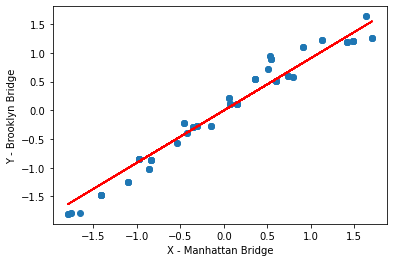

In [61]:
ploteo(train_x_scaler,train_y_scaler,y_predict,theta_optimum,features,label_y)

In [62]:
# 70% Train - 30% Test
# Quinto Par
x_label="Queensboro Bridge"
y_label="Manhattan Bridge"
features = ["Queensboro Bridge"]
label_y = "Manhattan Bridge"
confg_train = [0.03, 100]
theta_optimum, train_x_scaler, train_y_scaler, y_predict, test_x_scaler,test_y_scaler= experiment(
    df, confg_train, features, label_y, percentage_test=0.5
)

Theta = [-0.01575135  0.92654986]
Final Cost =  0.015820127935697852


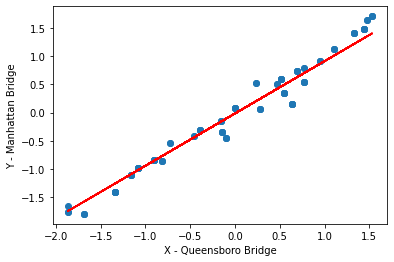

In [63]:
ploteo(train_x_scaler,train_y_scaler,y_predict,theta_optimum,features,label_y)